<a href="https://colab.research.google.com/github/hariomvyas/MLProjects/blob/main/K_MeansFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K-Means Algorithm from Scratch

**How does the kmeans algorithm work?**

The kMeans algorithm finds those k points (called centroids) that minimize the sum of squared errors. This process is done iteratively until the total error is not reduced anymore. At that time we will have reached a minimum and our observations will be classified into different groups or clusters.

Thus, the Kmeans algorithm consists of the following steps:


1.   We initialize k centroids randomly.
2.   Calculate the sum of squared deviations.
3. Assign a centroid to each of the observations.
4. Calculate the sum of total errors and compare it with the sum in the previous iteration.
5. If the error decreases, recalculate centroids and repeat the process.

Reference: https://anderfernandez.com/en/blog/kmeans-algorithm-python/

In [ ]:
# Creating Fake data

import math
import numpy as np
import pandas as pd
np.random.seed(123)

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1, center_x = 0 , center_y = 0):
    pi = math.pi
    r = R * np.sqrt(np.random.uniform(minimo, maximo, size = num_datos))
    theta = np.random.uniform(minimo, maximo, size= num_datos) * 2 * pi

    x = center_x + np.cos(theta) * r
    y = center_y + np.sin(theta) * r

    x = np.round(x,3)
    y = np.round(y,3)

    df = np.column_stack([x,y])
    df = pd.DataFrame(df)
    df.columns = ['x','y']
    return(df)

# Create data
datos_1 = circulo(num_datos = 20,R = 10, center_x = 5, center_y = 30)
datos_2 = circulo(num_datos = 20,R = 10, center_x = 20, center_y = 10)
datos_3 = circulo(num_datos = 20,R = 10, center_x = 50, center_y = 50)

data = datos_1.append(datos_2).append(datos_3)
data.head()

,x,y
0,-0.542,23.761
1,8.129,25.661
2,4.239,25.298
3,-0.691,25.230
4,3.539,21.645


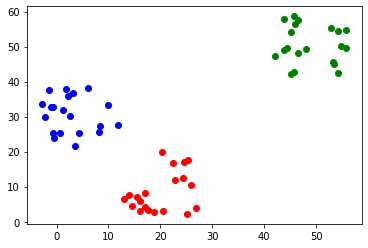

In [ ]:
# Visualizing our data

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(datos_1['x'], datos_1['y'], c = 'b')
plt.scatter(datos_2['x'], datos_2['y'], c = 'r')
plt.scatter(datos_3['x'], datos_3['y'], c = 'g')
plt.show()

Random Initialization of the Centroids

In [ ]:
def initialize_centroids(k, data):

    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids

centroids = initialize_centroids(3, data)
centroids

,x,y
0,52.833388,9.953092
1,15.168107,29.151304
2,52.622571,57.644971


Calculate the sum of squared errors:

error=(x2–x1)^2+(y2–y1)^2


In [ ]:
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the root of the sum of squared errores.
    '''
    error = np.square(np.sum((a-b)**2))

    return error

In [ ]:
errors = np.array([])
for centroid in range(centroids.shape[0]):
    error = calculate_error(centroids.iloc[centroid, :2], data.iloc[0,:2])
    errors = np.append(errors, error)

errors

array([ 9239109.47028511,    76100.30291143, 15797406.01662303])

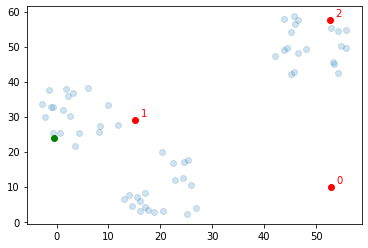

In [ ]:
# Checking errors visually

plt.scatter(data.iloc[1:,0], data.iloc[1:,1],  marker = 'o', alpha = 0.2)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', c = 'r')
plt.scatter(data.iloc[0,0], data.iloc[0,1],  marker = 'o', c = 'g')
for i in range(centroids.shape[0]):
    plt.text(centroids.iloc[i,0]+1, centroids.iloc[i,1]+1, s = centroids.index[i], c = 'r')

Assigning a centroid to each of the observations

In [ ]:
# finding the position of the minimum value in the error list

np.where(errors == np.amin(errors))[0].tolist()[0]

1

In [ ]:
# Applying the same process to all observations

def assign_centroid(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

data['centroid'], data['error'] = assign_centroid(data.iloc[:,:2] ,centroids)
data[['centroid', 'error']].head()

,centroid,error
0,1,76100.302911
1,1,3810.746835
2,1,18034.697838
3,1,71229.148068
4,1,36703.174251


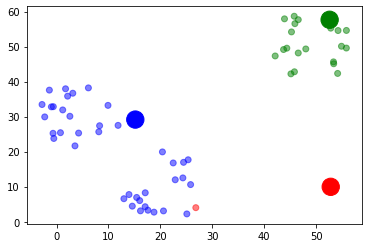

In [ ]:
# Checking it Visually

colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300,
           c = centroids.index.map(lambda x: colors[x]))

Calculate the Sum of Total Errors

In [ ]:
# simply adding the errors will give us the total number of errors:

data['error'].sum()

7089622.406081449

Recalculate the position of the centroids

In [ ]:
data_columns = ['x','y']

centroids = data.groupby('centroid').agg('mean').loc[:,data_columns].reset_index(drop = True)
centroids

,x,y
0,26.831000,4.002000
1,10.902256,19.928974
2,48.898800,50.526050


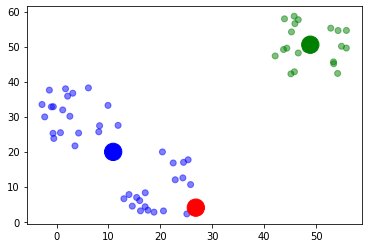

In [ ]:
# Visualizing the change

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300,
           c = centroids.index.map(lambda x: colors[x]))

Putting Everything together

In [ ]:
def knn(data, k):
    '''
    Given a dataset and number of clusters, it clusterizes the data.
    data: a DataFrame with all information necessary
    k: number of clusters to create
    '''

    # Initialize centroids and error
    centroids = initialize_centroids(k, data)
    error = []
    compr = True
    i = 0

    while(compr):
        # Obtain centroids and error
        data['centroid'], iter_error = assign_centroid(data,centroids)
        error.append(sum(iter_error))
        # Recalculate centroids
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)

        # Check if the error has decreased
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i],3) !=  round(error[i-1],3)):
                compr = True
            else:
                compr = False
        i = i + 1

    data['centroid'], iter_error = assign_centroid(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return (data['centroid'], iter_error, centroids)

In [ ]:
data['centroid'], _, centroids =  knn(data.drop(['centroid','error'], axis = 1),3)
data['centroid'].head()

0    0
1    0
2    0
3    0
4    0
Name: centroid, dtype: int64

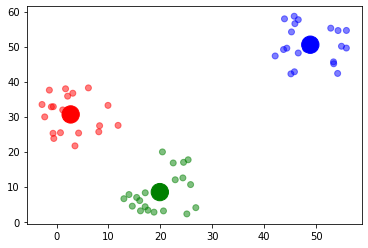

In [ ]:
# Visually Checking our clustering

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300,
           c = centroids.index.map(lambda x: colors[x]))